In [1]:
import numpy as np, matplotlib.pyplot as plt
dir = '21dec20' # enter date string of dataset

### Read in data

In [2]:
# read in data files, and take out means

d1,m1 = np.loadtxt('/mnt/data/dsa110/T1/corr17/'+dir+'/beams_corr17.dat').transpose()
d1 = d1.reshape((int(len(d1)/64),64))[3:,:]
d2,m2 = np.loadtxt('/mnt/data/dsa110/T1/corr18/'+dir+'/beams_corr18.dat').transpose()
d2 = d2.reshape((int(len(d2)/64),64))[3:,:]
d3,m3 = np.loadtxt('/mnt/data/dsa110/T1/corr19/'+dir+'/beams_corr19.dat').transpose()
d3 = d3.reshape((int(len(d3)/64),64))[3:,:]
d4,m4 = np.loadtxt('/mnt/data/dsa110/T1/corr20/'+dir+'/beams_corr20.dat').transpose()
d4 = d4.reshape((int(len(d4)/64),64))[3:,:]
m1 = m1.reshape((int(len(m1)/64),64))[3:,:]
m2 = m2.reshape((int(len(m2)/64),64))[3:,:]
m3 = m3.reshape((int(len(m3)/64),64))[3:,:]
m4 = m4.reshape((int(len(m4)/64),64))[3:,:]

mn1 = np.mean(d4,axis=1)
for i in range(d4.shape[1]):
    d4[:,i]-=mn1
mn1 = np.mean(d4,axis=0)
for i in range(d4.shape[0]):
    d4[i,:]-=mn1
mn1 = np.mean(d3,axis=1)
for i in range(d3.shape[1]):
    d3[:,i]-=mn1
mn1 = np.mean(d3,axis=0)
for i in range(d3.shape[0]):
    d3[i,:]-=mn1
mn1 = np.mean(d2,axis=1)
for i in range(d2.shape[1]):
    d2[:,i]-=mn1
mn1 = np.mean(d2,axis=0)
for i in range(d2.shape[0]):
    d2[i,:]-=mn1
mn1 = np.mean(d1,axis=1)
for i in range(d1.shape[1]):
    d1[:,i]-=mn1
mn1 = np.mean(d1,axis=0)
for i in range(d1.shape[0]):
    d1[i,:]-=mn1

### Plot power in each beam at each time

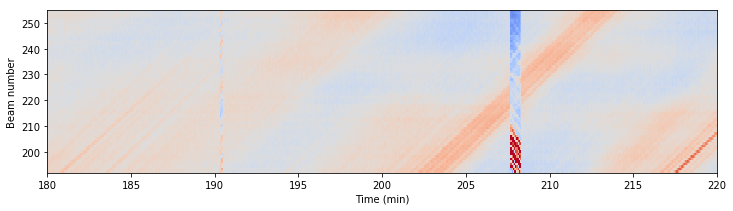

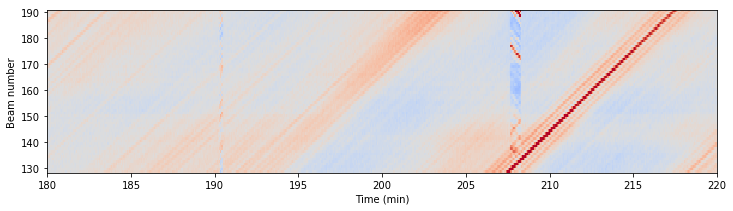

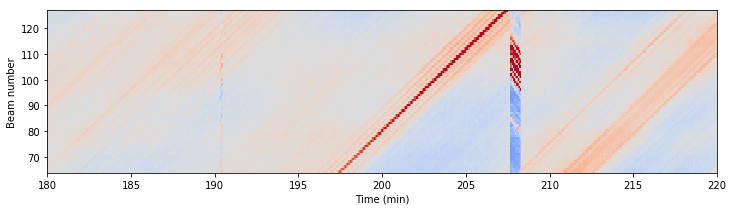

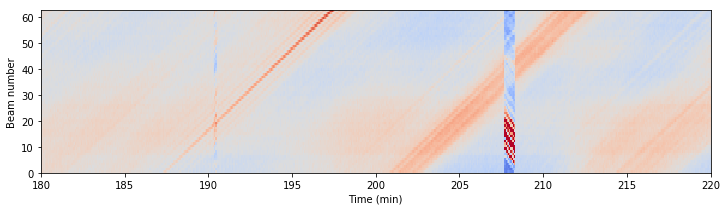

In [5]:
x1 = 0. # enter start hr of plotting
x2 = 24. # enter end hr of plotting
vmin = np.median(d3)-1.*np.std(d3) # min saturation - adjust as needed
vmax = np.median(d3)+1.*np.std(d3) # max saturation - adjust as needed

plt.figure(figsize=(12,3))
plt.xlim(x1,x2)
plt.imshow(d4.transpose(),vmin=vmin,vmax=vmax,origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d4.shape[0]*4.294967296/3600.,192,255])
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')

plt.figure(figsize=(12,3))
plt.xlim(x1,x2)
plt.imshow(d3.transpose(),vmin=vmin,vmax=vmax,origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d3.shape[0]*4.294967296/3600.,128,191])
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')

plt.figure(figsize=(12,3))
plt.xlim(x1,x2)
plt.imshow(d2.transpose(),vmin=vmin,vmax=vmax,origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d2.shape[0]*4.294967296/3600.,64,127])
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')

plt.figure(figsize=(12,3))
plt.xlim(x1,x2)
plt.imshow(d1.transpose(),vmin=vmin,vmax=vmax,origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d1.shape[0]*4.294967296/3600.,0,63])
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')

plt.show()

### Plot the flag counts

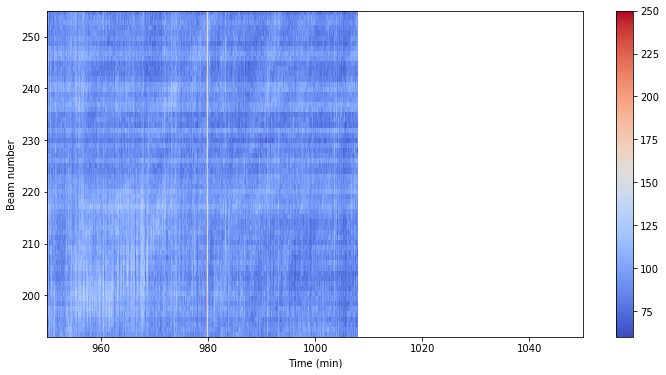

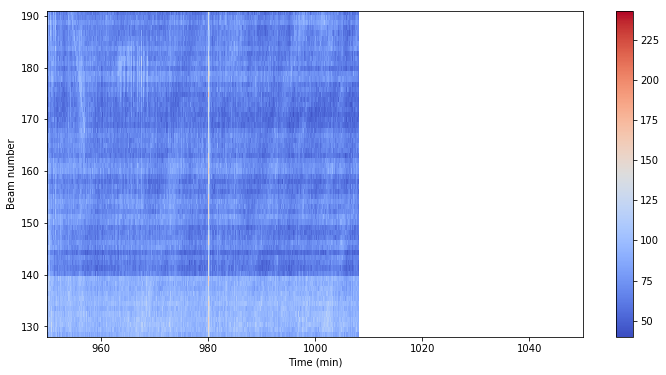

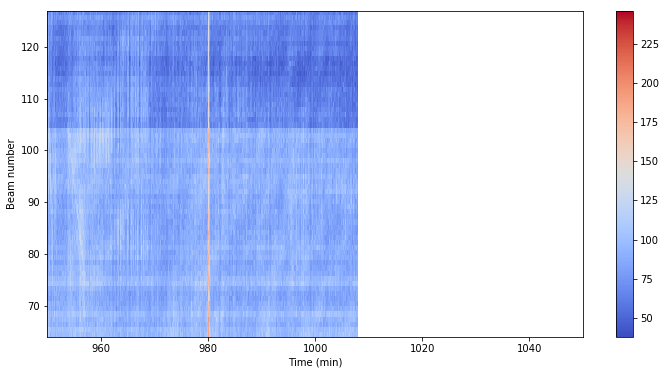

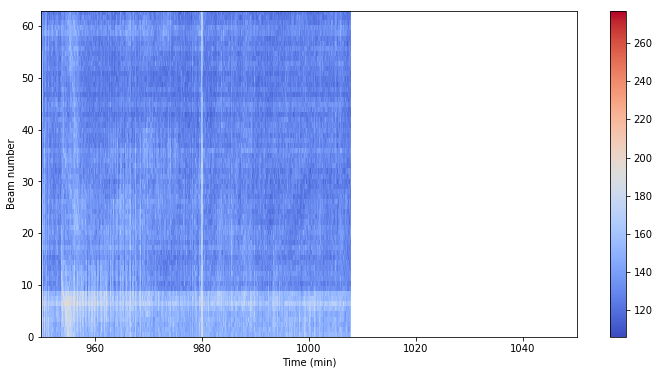

In [8]:
# This plot the number of channels flagged per beam per time interval. No need to adjust anything. 

plt.figure(figsize=(12,6))
plt.xlim(x1,x2)
plt.imshow(m4.transpose(),origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d4.shape[0]*4.294967296/3600.,192,255])
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')
plt.colorbar()
plt.figure(figsize=(12,6))
plt.xlim(x1,x2)
plt.imshow(m3.transpose(),origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d3.shape[0]*4.294967296/3600.,128,191])
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')
plt.colorbar()
plt.figure(figsize=(12,6))
plt.xlim(x1,x2)
plt.imshow(m2.transpose(),origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d2.shape[0]*4.294967296/3600.,64,127])
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')
plt.colorbar()
plt.figure(figsize=(12,6))
plt.xlim(x1,x2)
plt.imshow(m1.transpose(),origin='lower',interpolation='none',aspect='auto',cmap='coolwarm',extent=[0.,d1.shape[0]*4.294967296/3600.,0,63])
plt.xlabel('Time (hr)')
plt.ylabel('Beam number')
plt.colorbar()